In [5]:

import numpy as np
import pandas as pd

from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor

In [8]:
# load data set

df = pd.read_csv('../data/toyota_ohe.csv')

In [9]:
df.head()

,Unnamed: 0,price,mileage,tax,mpg,engineSize,age_of_car,model_ Auris,model_ Avensis,model_ Aygo,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0,16000,24089,265,36.2,2.0,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,15995,18615,145,36.2,2.0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,13998,27469,265,36.2,2.0,5,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,18998,14736,150,36.2,2.0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,4,17498,36284,145,36.2,2.0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,16000,24089,265,36.2,2.0,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,15995,18615,145,36.2,2.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,13998,27469,265,36.2,2.0,5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,18998,14736,150,36.2,2.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,17498,36284,145,36.2,2.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
#Split-outvalidationdataset
array = df.values
X = array[:,1:]
Y = array[:,1]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=test_size, random_state=seed)

In [15]:
X_train.shape, Y_train.shape

((5390, 31), (5390,))

In [19]:
X_test.shape, Y_test.shape

((1348, 31), (1348,))

In [16]:
#Testoptionsandevaluationmetric
num_folds = 10
seed = 7
scoring = 'neg_mean_absolute_error'

In [17]:
#ensembles
ensembles = []
ensembles.append(('ScaledCAT', Pipeline([('Scaler', StandardScaler()),('CAT',CatBoostRegressor())])))


In [18]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\Anaconda3\envs\fastai_v1\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Learning rate set to 0.051699
0:	learn: 18052.8554147	total: 58.1ms	remaining: 58s
1:	learn: 17224.2059479	total: 60.2ms	remaining: 30s
2:	learn: 16477.2829282	total: 62.2ms	remaining: 20.7s
3:	learn: 15713.4685651	total: 64.4ms	remaining: 16s
4:	learn: 15015.0205451	total: 66.5ms	remaining: 13.2s
5:	learn: 14350.1370007	total: 68.4ms	remaining: 11.3s
6:	learn: 13702.7502269	total: 70.3ms	remaining: 9.97s
7:	learn: 13076.8237356	total: 73ms	remaining: 9.06s
8:	learn: 12487.4432312	total: 74.9ms	remaining: 8.24s
9:	learn: 11966.5601099	total: 77.5ms	remaining: 7.68s
10:	learn: 11443.5341950	total: 79.5ms	remaining: 7.15s
11:	learn: 10926.5818097	total: 81.4ms	remaining: 6.7s
12:	learn: 10466.1364942	total: 83.3ms	remaining: 6.32s
13:	learn: 10010.1240408	total: 85.1ms	remaining: 5.99s
14:	learn: 9595.6327846	total: 86.9ms	remaining: 5.71s
15:	learn: 9161.0859877	total: 88.8ms	remaining: 5.46s
16:	learn: 8773.3305281	total: 90.8ms	remaining: 5.25s
17:	learn: 8370.7619012	total: 92.6ms	re

211:	learn: 528.5165154	total: 472ms	remaining: 1.75s
212:	learn: 527.6344043	total: 474ms	remaining: 1.75s
213:	learn: 526.9890466	total: 476ms	remaining: 1.75s
214:	learn: 525.8408123	total: 478ms	remaining: 1.75s
215:	learn: 524.0829320	total: 480ms	remaining: 1.74s
216:	learn: 521.5049880	total: 482ms	remaining: 1.74s
217:	learn: 520.2366209	total: 486ms	remaining: 1.74s
218:	learn: 518.8666414	total: 488ms	remaining: 1.74s
219:	learn: 518.0320024	total: 490ms	remaining: 1.74s
220:	learn: 517.4036249	total: 491ms	remaining: 1.73s
221:	learn: 515.0629079	total: 493ms	remaining: 1.73s
222:	learn: 514.4551065	total: 495ms	remaining: 1.73s
223:	learn: 513.2925394	total: 497ms	remaining: 1.72s
224:	learn: 512.7162158	total: 499ms	remaining: 1.72s
225:	learn: 511.1541086	total: 501ms	remaining: 1.72s
226:	learn: 509.9668857	total: 503ms	remaining: 1.71s
227:	learn: 507.9980472	total: 505ms	remaining: 1.71s
228:	learn: 506.8884250	total: 507ms	remaining: 1.71s
229:	learn: 506.3351540	tota

377:	learn: 390.4879629	total: 791ms	remaining: 1.3s
378:	learn: 389.5881102	total: 793ms	remaining: 1.3s
379:	learn: 388.7562081	total: 795ms	remaining: 1.3s
380:	learn: 387.8493401	total: 797ms	remaining: 1.29s
381:	learn: 386.8771732	total: 799ms	remaining: 1.29s
382:	learn: 386.8273369	total: 801ms	remaining: 1.29s
383:	learn: 385.9246866	total: 808ms	remaining: 1.29s
384:	learn: 385.5096446	total: 809ms	remaining: 1.29s
385:	learn: 384.8314277	total: 811ms	remaining: 1.29s
386:	learn: 384.1773894	total: 814ms	remaining: 1.29s
387:	learn: 383.2016140	total: 816ms	remaining: 1.29s
388:	learn: 383.1064493	total: 818ms	remaining: 1.28s
389:	learn: 382.5251922	total: 823ms	remaining: 1.29s
390:	learn: 382.4800613	total: 825ms	remaining: 1.28s
391:	learn: 382.0949669	total: 828ms	remaining: 1.28s
392:	learn: 381.3260657	total: 830ms	remaining: 1.28s
393:	learn: 381.2827342	total: 832ms	remaining: 1.28s
394:	learn: 380.3996832	total: 834ms	remaining: 1.28s
395:	learn: 379.6649476	total: 

614:	learn: 285.1066651	total: 1.27s	remaining: 796ms
615:	learn: 285.0828441	total: 1.27s	remaining: 794ms
616:	learn: 285.0058450	total: 1.27s	remaining: 792ms
617:	learn: 284.6469389	total: 1.28s	remaining: 789ms
618:	learn: 284.3879658	total: 1.28s	remaining: 787ms
619:	learn: 283.9305476	total: 1.28s	remaining: 785ms
620:	learn: 283.5098379	total: 1.28s	remaining: 783ms
621:	learn: 283.2719567	total: 1.28s	remaining: 781ms
622:	learn: 283.0339076	total: 1.29s	remaining: 778ms
623:	learn: 282.5539737	total: 1.29s	remaining: 776ms
624:	learn: 282.3649513	total: 1.29s	remaining: 774ms
625:	learn: 281.9847682	total: 1.29s	remaining: 772ms
626:	learn: 281.7384861	total: 1.29s	remaining: 770ms
627:	learn: 281.5414298	total: 1.3s	remaining: 768ms
628:	learn: 281.1979014	total: 1.3s	remaining: 766ms
629:	learn: 281.0446896	total: 1.3s	remaining: 764ms
630:	learn: 280.8028854	total: 1.3s	remaining: 762ms
631:	learn: 280.5716646	total: 1.3s	remaining: 760ms
632:	learn: 280.3493178	total: 1.

777:	learn: 247.8060309	total: 1.59s	remaining: 454ms
778:	learn: 247.4781862	total: 1.59s	remaining: 452ms
779:	learn: 247.1872828	total: 1.6s	remaining: 450ms
780:	learn: 246.8310924	total: 1.6s	remaining: 448ms
781:	learn: 246.7139861	total: 1.6s	remaining: 446ms
782:	learn: 246.4842044	total: 1.6s	remaining: 444ms
783:	learn: 246.4711661	total: 1.6s	remaining: 442ms
784:	learn: 245.9171718	total: 1.6s	remaining: 440ms
785:	learn: 245.9098579	total: 1.61s	remaining: 438ms
786:	learn: 245.7781867	total: 1.61s	remaining: 436ms
787:	learn: 245.6583844	total: 1.61s	remaining: 433ms
788:	learn: 245.6439239	total: 1.61s	remaining: 431ms
789:	learn: 245.5799321	total: 1.62s	remaining: 430ms
790:	learn: 245.5689347	total: 1.62s	remaining: 428ms
791:	learn: 245.5590143	total: 1.62s	remaining: 426ms
792:	learn: 245.4905427	total: 1.62s	remaining: 423ms
793:	learn: 245.2392510	total: 1.62s	remaining: 421ms
794:	learn: 245.2263092	total: 1.63s	remaining: 419ms
795:	learn: 245.0347568	total: 1.6

954:	learn: 217.5806853	total: 1.92s	remaining: 90.4ms
955:	learn: 217.3565990	total: 1.92s	remaining: 88.3ms
956:	learn: 217.1626908	total: 1.92s	remaining: 86.3ms
957:	learn: 217.0408762	total: 1.92s	remaining: 84.3ms
958:	learn: 216.8926788	total: 1.93s	remaining: 82.3ms
959:	learn: 216.6566782	total: 1.93s	remaining: 80.3ms
960:	learn: 216.4612952	total: 1.93s	remaining: 78.3ms
961:	learn: 216.3834082	total: 1.93s	remaining: 76.3ms
962:	learn: 216.2262952	total: 1.93s	remaining: 74.3ms
963:	learn: 216.0943185	total: 1.93s	remaining: 72.3ms
964:	learn: 215.9299171	total: 1.94s	remaining: 70.2ms
965:	learn: 215.7262320	total: 1.94s	remaining: 68.2ms
966:	learn: 215.7213235	total: 1.94s	remaining: 66.2ms
967:	learn: 215.4624446	total: 1.94s	remaining: 64.2ms
968:	learn: 215.2781398	total: 1.94s	remaining: 62.2ms
969:	learn: 215.1807392	total: 1.95s	remaining: 60.2ms
970:	learn: 214.9696258	total: 1.95s	remaining: 58.2ms
971:	learn: 214.7611960	total: 1.95s	remaining: 56.2ms
972:	learn

166:	learn: 771.6688803	total: 314ms	remaining: 1.57s
167:	learn: 769.6318773	total: 317ms	remaining: 1.57s
168:	learn: 765.3740090	total: 319ms	remaining: 1.57s
169:	learn: 762.8627666	total: 321ms	remaining: 1.56s
170:	learn: 762.2310566	total: 322ms	remaining: 1.56s
171:	learn: 760.8925522	total: 325ms	remaining: 1.56s
172:	learn: 759.6688078	total: 327ms	remaining: 1.56s
173:	learn: 755.1721233	total: 328ms	remaining: 1.56s
174:	learn: 752.4801747	total: 330ms	remaining: 1.56s
175:	learn: 748.6484506	total: 332ms	remaining: 1.55s
176:	learn: 746.8415366	total: 334ms	remaining: 1.55s
177:	learn: 745.0997665	total: 336ms	remaining: 1.55s
178:	learn: 740.3340835	total: 338ms	remaining: 1.55s
179:	learn: 736.7442549	total: 340ms	remaining: 1.55s
180:	learn: 733.1853015	total: 342ms	remaining: 1.55s
181:	learn: 729.2373629	total: 344ms	remaining: 1.54s
182:	learn: 728.1776339	total: 346ms	remaining: 1.54s
183:	learn: 723.7393782	total: 348ms	remaining: 1.54s
184:	learn: 718.4300816	tota

338:	learn: 491.6284208	total: 639ms	remaining: 1.25s
339:	learn: 489.9877315	total: 641ms	remaining: 1.24s
340:	learn: 489.1271613	total: 643ms	remaining: 1.24s
341:	learn: 487.9047737	total: 645ms	remaining: 1.24s
342:	learn: 486.3293808	total: 647ms	remaining: 1.24s
343:	learn: 485.5853252	total: 649ms	remaining: 1.24s
344:	learn: 484.0529205	total: 651ms	remaining: 1.24s
345:	learn: 482.9220135	total: 653ms	remaining: 1.23s
346:	learn: 482.2117638	total: 655ms	remaining: 1.23s
347:	learn: 480.7171123	total: 657ms	remaining: 1.23s
348:	learn: 479.3690516	total: 659ms	remaining: 1.23s
349:	learn: 477.9229448	total: 661ms	remaining: 1.23s
350:	learn: 476.3060434	total: 663ms	remaining: 1.23s
351:	learn: 474.1571103	total: 665ms	remaining: 1.22s
352:	learn: 472.5197278	total: 667ms	remaining: 1.22s
353:	learn: 472.3355051	total: 669ms	remaining: 1.22s
354:	learn: 472.0613756	total: 670ms	remaining: 1.22s
355:	learn: 471.8848329	total: 672ms	remaining: 1.22s
356:	learn: 470.8626579	tota

494:	learn: 378.1542692	total: 965ms	remaining: 984ms
495:	learn: 378.1159789	total: 967ms	remaining: 983ms
496:	learn: 377.5176505	total: 969ms	remaining: 981ms
497:	learn: 376.8220308	total: 971ms	remaining: 979ms
498:	learn: 376.1985275	total: 973ms	remaining: 977ms
499:	learn: 375.6670555	total: 976ms	remaining: 976ms
500:	learn: 374.9044195	total: 978ms	remaining: 974ms
501:	learn: 374.2798730	total: 980ms	remaining: 972ms
502:	learn: 374.2420732	total: 982ms	remaining: 970ms
503:	learn: 373.7186238	total: 984ms	remaining: 968ms
504:	learn: 373.6817348	total: 986ms	remaining: 966ms
505:	learn: 373.6105794	total: 987ms	remaining: 964ms
506:	learn: 373.1354067	total: 989ms	remaining: 962ms
507:	learn: 372.6435011	total: 992ms	remaining: 960ms
508:	learn: 372.5700465	total: 994ms	remaining: 959ms
509:	learn: 371.9627330	total: 996ms	remaining: 957ms
510:	learn: 371.3732052	total: 1s	remaining: 958ms
511:	learn: 370.8127597	total: 1s	remaining: 956ms
512:	learn: 370.0410295	total: 1s	

662:	learn: 310.7076187	total: 1.29s	remaining: 655ms
663:	learn: 310.2667822	total: 1.29s	remaining: 653ms
664:	learn: 309.8237176	total: 1.29s	remaining: 651ms
665:	learn: 309.4659976	total: 1.29s	remaining: 649ms
666:	learn: 309.0168671	total: 1.3s	remaining: 650ms
667:	learn: 308.6424795	total: 1.3s	remaining: 648ms
668:	learn: 308.2644032	total: 1.3s	remaining: 646ms
669:	learn: 307.8276600	total: 1.31s	remaining: 644ms
670:	learn: 307.5320660	total: 1.31s	remaining: 642ms
671:	learn: 307.1071522	total: 1.31s	remaining: 640ms
672:	learn: 306.6897267	total: 1.31s	remaining: 638ms
673:	learn: 306.6040859	total: 1.31s	remaining: 636ms
674:	learn: 306.2117578	total: 1.32s	remaining: 634ms
675:	learn: 305.7753739	total: 1.32s	remaining: 632ms
676:	learn: 305.4873638	total: 1.32s	remaining: 630ms
677:	learn: 305.0451010	total: 1.32s	remaining: 628ms
678:	learn: 304.7437664	total: 1.32s	remaining: 626ms
679:	learn: 304.5186315	total: 1.33s	remaining: 624ms
680:	learn: 304.1026866	total: 

836:	learn: 267.8953181	total: 1.62s	remaining: 315ms
837:	learn: 267.8869962	total: 1.62s	remaining: 313ms
838:	learn: 267.8756604	total: 1.62s	remaining: 311ms
839:	learn: 267.8599951	total: 1.62s	remaining: 309ms
840:	learn: 267.8523178	total: 1.63s	remaining: 307ms
841:	learn: 267.6405743	total: 1.63s	remaining: 305ms
842:	learn: 267.2404991	total: 1.63s	remaining: 303ms
843:	learn: 266.9543046	total: 1.63s	remaining: 302ms
844:	learn: 266.9437123	total: 1.63s	remaining: 300ms
845:	learn: 266.6169086	total: 1.64s	remaining: 298ms
846:	learn: 266.3964595	total: 1.64s	remaining: 296ms
847:	learn: 266.1009044	total: 1.64s	remaining: 294ms
848:	learn: 265.8935509	total: 1.64s	remaining: 292ms
849:	learn: 265.6916248	total: 1.64s	remaining: 290ms
850:	learn: 265.2815069	total: 1.64s	remaining: 288ms
851:	learn: 265.0628982	total: 1.65s	remaining: 286ms
852:	learn: 264.8643771	total: 1.65s	remaining: 284ms
853:	learn: 264.7544441	total: 1.65s	remaining: 282ms
854:	learn: 264.6006110	tota

Learning rate set to 0.051699
0:	learn: 17958.2662548	total: 8.15ms	remaining: 8.14s
1:	learn: 17128.5695313	total: 14.6ms	remaining: 7.29s
2:	learn: 16374.7249782	total: 17.5ms	remaining: 5.82s
3:	learn: 15610.9185597	total: 20.6ms	remaining: 5.13s
4:	learn: 14914.6898482	total: 23.7ms	remaining: 4.72s
5:	learn: 14262.0417335	total: 26.7ms	remaining: 4.42s
6:	learn: 13614.9785320	total: 29.6ms	remaining: 4.2s
7:	learn: 13000.0847210	total: 32.6ms	remaining: 4.05s
8:	learn: 12401.1779142	total: 35.7ms	remaining: 3.93s
9:	learn: 11883.2140613	total: 38.7ms	remaining: 3.83s
10:	learn: 11343.9240626	total: 41.2ms	remaining: 3.7s
11:	learn: 10844.1176965	total: 43.1ms	remaining: 3.55s
12:	learn: 10382.3798849	total: 45.2ms	remaining: 3.43s
13:	learn: 9947.6044931	total: 47.1ms	remaining: 3.32s
14:	learn: 9536.1232487	total: 49.1ms	remaining: 3.22s
15:	learn: 9124.7979618	total: 50.9ms	remaining: 3.13s
16:	learn: 8739.1602187	total: 52.8ms	remaining: 3.06s
17:	learn: 8342.3411818	total: 54.

158:	learn: 829.0134755	total: 315ms	remaining: 1.67s
159:	learn: 823.1279868	total: 317ms	remaining: 1.66s
160:	learn: 821.9142758	total: 319ms	remaining: 1.66s
161:	learn: 819.3533267	total: 321ms	remaining: 1.66s
162:	learn: 814.7930619	total: 323ms	remaining: 1.66s
163:	learn: 813.9932294	total: 325ms	remaining: 1.65s
164:	learn: 808.6064976	total: 327ms	remaining: 1.65s
165:	learn: 804.1697500	total: 329ms	remaining: 1.65s
166:	learn: 799.5645000	total: 330ms	remaining: 1.65s
167:	learn: 798.8103176	total: 332ms	remaining: 1.64s
168:	learn: 794.5918200	total: 334ms	remaining: 1.64s
169:	learn: 792.0428922	total: 336ms	remaining: 1.64s
170:	learn: 791.1174188	total: 337ms	remaining: 1.64s
171:	learn: 790.1652408	total: 339ms	remaining: 1.63s
172:	learn: 785.3996304	total: 341ms	remaining: 1.63s
173:	learn: 784.4833954	total: 343ms	remaining: 1.63s
174:	learn: 780.4427823	total: 345ms	remaining: 1.63s
175:	learn: 779.1250741	total: 347ms	remaining: 1.62s
176:	learn: 778.5402688	tota

333:	learn: 523.1482278	total: 640ms	remaining: 1.28s
334:	learn: 522.1229619	total: 642ms	remaining: 1.27s
335:	learn: 522.0025423	total: 644ms	remaining: 1.27s
336:	learn: 521.2311066	total: 646ms	remaining: 1.27s
337:	learn: 519.0734131	total: 648ms	remaining: 1.27s
338:	learn: 516.7338228	total: 650ms	remaining: 1.27s
339:	learn: 514.4689968	total: 651ms	remaining: 1.26s
340:	learn: 514.3543181	total: 654ms	remaining: 1.26s
341:	learn: 513.1590318	total: 656ms	remaining: 1.26s
342:	learn: 513.0468480	total: 657ms	remaining: 1.26s
343:	learn: 511.0268508	total: 659ms	remaining: 1.26s
344:	learn: 509.6377933	total: 661ms	remaining: 1.25s
345:	learn: 508.0875443	total: 663ms	remaining: 1.25s
346:	learn: 506.1261561	total: 664ms	remaining: 1.25s
347:	learn: 504.7767540	total: 666ms	remaining: 1.25s
348:	learn: 503.5320554	total: 669ms	remaining: 1.25s
349:	learn: 501.7038292	total: 670ms	remaining: 1.24s
350:	learn: 501.6000613	total: 672ms	remaining: 1.24s
351:	learn: 500.4871971	tota

510:	learn: 375.3736861	total: 970ms	remaining: 928ms
511:	learn: 374.6545840	total: 972ms	remaining: 926ms
512:	learn: 374.0641085	total: 974ms	remaining: 925ms
513:	learn: 373.5611191	total: 976ms	remaining: 923ms
514:	learn: 373.5218803	total: 978ms	remaining: 921ms
515:	learn: 372.9753402	total: 980ms	remaining: 919ms
516:	learn: 372.6658644	total: 983ms	remaining: 918ms
517:	learn: 372.2809219	total: 985ms	remaining: 916ms
518:	learn: 372.2559283	total: 987ms	remaining: 914ms
519:	learn: 371.5863117	total: 989ms	remaining: 913ms
520:	learn: 371.0711091	total: 990ms	remaining: 911ms
521:	learn: 371.0508474	total: 992ms	remaining: 909ms
522:	learn: 371.0189726	total: 994ms	remaining: 907ms
523:	learn: 370.3402030	total: 996ms	remaining: 905ms
524:	learn: 370.3162520	total: 998ms	remaining: 903ms
525:	learn: 369.8094619	total: 1000ms	remaining: 901ms
526:	learn: 369.7787790	total: 1s	remaining: 899ms
527:	learn: 369.2955501	total: 1s	remaining: 897ms
528:	learn: 368.6803108	total: 1s

708:	learn: 295.9338973	total: 1.36s	remaining: 558ms
709:	learn: 295.4631262	total: 1.36s	remaining: 556ms
710:	learn: 295.4494680	total: 1.36s	remaining: 554ms
711:	learn: 295.1859998	total: 1.36s	remaining: 552ms
712:	learn: 295.1559254	total: 1.37s	remaining: 550ms
713:	learn: 295.1398185	total: 1.37s	remaining: 548ms
714:	learn: 294.8410123	total: 1.37s	remaining: 546ms
715:	learn: 294.8284563	total: 1.37s	remaining: 545ms
716:	learn: 294.6536473	total: 1.37s	remaining: 543ms
717:	learn: 294.2495411	total: 1.38s	remaining: 541ms
718:	learn: 294.2378035	total: 1.38s	remaining: 539ms
719:	learn: 293.7512565	total: 1.38s	remaining: 537ms
720:	learn: 293.7402907	total: 1.38s	remaining: 535ms
721:	learn: 293.7296723	total: 1.38s	remaining: 533ms
722:	learn: 293.3414499	total: 1.39s	remaining: 531ms
723:	learn: 293.1598867	total: 1.39s	remaining: 529ms
724:	learn: 292.7832166	total: 1.39s	remaining: 527ms
725:	learn: 292.2739791	total: 1.39s	remaining: 525ms
726:	learn: 291.7769916	tota

887:	learn: 253.2327409	total: 1.69s	remaining: 213ms
888:	learn: 253.0804890	total: 1.69s	remaining: 211ms
889:	learn: 253.0748746	total: 1.69s	remaining: 209ms
890:	learn: 253.0694337	total: 1.69s	remaining: 207ms
891:	learn: 252.7877753	total: 1.7s	remaining: 205ms
892:	learn: 252.7824818	total: 1.7s	remaining: 203ms
893:	learn: 252.4915809	total: 1.7s	remaining: 202ms
894:	learn: 252.1157687	total: 1.7s	remaining: 200ms
895:	learn: 251.8255749	total: 1.7s	remaining: 198ms
896:	learn: 251.5350750	total: 1.71s	remaining: 196ms
897:	learn: 251.1561736	total: 1.71s	remaining: 194ms
898:	learn: 250.8938549	total: 1.71s	remaining: 192ms
899:	learn: 250.7125419	total: 1.71s	remaining: 190ms
900:	learn: 250.5239204	total: 1.71s	remaining: 188ms
901:	learn: 250.5184797	total: 1.71s	remaining: 186ms
902:	learn: 250.3216743	total: 1.72s	remaining: 184ms
903:	learn: 250.3153251	total: 1.72s	remaining: 182ms
904:	learn: 250.1154692	total: 1.72s	remaining: 181ms
905:	learn: 249.9888809	total: 1.

83:	learn: 1114.4762186	total: 162ms	remaining: 1.76s
84:	learn: 1100.0555082	total: 164ms	remaining: 1.76s
85:	learn: 1095.4217826	total: 166ms	remaining: 1.76s
86:	learn: 1082.4262149	total: 167ms	remaining: 1.76s
87:	learn: 1079.1734942	total: 169ms	remaining: 1.75s
88:	learn: 1076.0534056	total: 170ms	remaining: 1.74s
89:	learn: 1064.5638242	total: 172ms	remaining: 1.74s
90:	learn: 1059.8619783	total: 174ms	remaining: 1.74s
91:	learn: 1051.1122622	total: 176ms	remaining: 1.74s
92:	learn: 1048.7760770	total: 177ms	remaining: 1.73s
93:	learn: 1046.5147705	total: 178ms	remaining: 1.72s
94:	learn: 1042.3579132	total: 181ms	remaining: 1.72s
95:	learn: 1040.1994090	total: 182ms	remaining: 1.71s
96:	learn: 1037.4012188	total: 184ms	remaining: 1.71s
97:	learn: 1025.6949252	total: 186ms	remaining: 1.72s
98:	learn: 1021.7247222	total: 188ms	remaining: 1.71s
99:	learn: 1019.1571286	total: 190ms	remaining: 1.71s
100:	learn: 1006.6203500	total: 192ms	remaining: 1.71s
101:	learn: 1001.2808908	to

260:	learn: 576.0464753	total: 489ms	remaining: 1.38s
261:	learn: 574.4495830	total: 491ms	remaining: 1.38s
262:	learn: 574.3145684	total: 495ms	remaining: 1.39s
263:	learn: 573.3612717	total: 497ms	remaining: 1.38s
264:	learn: 571.8491959	total: 499ms	remaining: 1.38s
265:	learn: 569.1804727	total: 501ms	remaining: 1.38s
266:	learn: 568.0168641	total: 503ms	remaining: 1.38s
267:	learn: 567.8932632	total: 505ms	remaining: 1.38s
268:	learn: 566.4459604	total: 507ms	remaining: 1.38s
269:	learn: 565.3120612	total: 509ms	remaining: 1.38s
270:	learn: 562.6452578	total: 511ms	remaining: 1.37s
271:	learn: 560.1258804	total: 513ms	remaining: 1.37s
272:	learn: 557.5573799	total: 514ms	remaining: 1.37s
273:	learn: 554.6712503	total: 516ms	remaining: 1.37s
274:	learn: 552.8845519	total: 518ms	remaining: 1.37s
275:	learn: 550.5195106	total: 520ms	remaining: 1.36s
276:	learn: 548.3135926	total: 522ms	remaining: 1.36s
277:	learn: 546.8942832	total: 524ms	remaining: 1.36s
278:	learn: 544.9059677	tota

429:	learn: 376.1802269	total: 816ms	remaining: 1.08s
430:	learn: 374.9259871	total: 818ms	remaining: 1.08s
431:	learn: 374.0319451	total: 819ms	remaining: 1.08s
432:	learn: 373.1085355	total: 821ms	remaining: 1.07s
433:	learn: 372.3434464	total: 823ms	remaining: 1.07s
434:	learn: 372.1323921	total: 825ms	remaining: 1.07s
435:	learn: 371.6196138	total: 827ms	remaining: 1.07s
436:	learn: 371.1198270	total: 830ms	remaining: 1.07s
437:	learn: 370.6970629	total: 832ms	remaining: 1.07s
438:	learn: 370.5566035	total: 834ms	remaining: 1.07s
439:	learn: 370.4427236	total: 836ms	remaining: 1.06s
440:	learn: 369.4750437	total: 838ms	remaining: 1.06s
441:	learn: 368.7399598	total: 840ms	remaining: 1.06s
442:	learn: 368.2365305	total: 842ms	remaining: 1.06s
443:	learn: 367.6148281	total: 844ms	remaining: 1.06s
444:	learn: 366.9797520	total: 846ms	remaining: 1.05s
445:	learn: 366.7063633	total: 848ms	remaining: 1.05s
446:	learn: 366.1448271	total: 850ms	remaining: 1.05s
447:	learn: 365.8372437	tota

606:	learn: 297.6471729	total: 1.14s	remaining: 741ms
607:	learn: 297.2114797	total: 1.15s	remaining: 739ms
608:	learn: 296.9375594	total: 1.15s	remaining: 738ms
609:	learn: 296.6463194	total: 1.15s	remaining: 737ms
610:	learn: 296.3680999	total: 1.15s	remaining: 735ms
611:	learn: 296.0429409	total: 1.16s	remaining: 733ms
612:	learn: 295.8719650	total: 1.16s	remaining: 731ms
613:	learn: 295.5396648	total: 1.16s	remaining: 730ms
614:	learn: 295.2307269	total: 1.16s	remaining: 728ms
615:	learn: 294.9286566	total: 1.16s	remaining: 726ms
616:	learn: 294.5139115	total: 1.17s	remaining: 724ms
617:	learn: 294.1768003	total: 1.17s	remaining: 722ms
618:	learn: 293.9161711	total: 1.17s	remaining: 720ms
619:	learn: 293.3938319	total: 1.17s	remaining: 718ms
620:	learn: 292.9139545	total: 1.17s	remaining: 716ms
621:	learn: 292.6277321	total: 1.18s	remaining: 714ms
622:	learn: 292.3409273	total: 1.18s	remaining: 712ms
623:	learn: 291.9669246	total: 1.18s	remaining: 711ms
624:	learn: 291.6790329	tota

781:	learn: 251.2089858	total: 1.47s	remaining: 410ms
782:	learn: 251.0302156	total: 1.47s	remaining: 409ms
783:	learn: 251.0257544	total: 1.48s	remaining: 407ms
784:	learn: 250.8675966	total: 1.48s	remaining: 405ms
785:	learn: 250.7025415	total: 1.48s	remaining: 403ms
786:	learn: 250.6969242	total: 1.48s	remaining: 401ms
787:	learn: 250.5235481	total: 1.48s	remaining: 399ms
788:	learn: 250.2265727	total: 1.49s	remaining: 397ms
789:	learn: 250.0203493	total: 1.49s	remaining: 395ms
790:	learn: 249.7340843	total: 1.49s	remaining: 393ms
791:	learn: 249.5525314	total: 1.49s	remaining: 391ms
792:	learn: 249.5387935	total: 1.49s	remaining: 390ms
793:	learn: 249.3024675	total: 1.49s	remaining: 388ms
794:	learn: 248.9345462	total: 1.5s	remaining: 386ms
795:	learn: 248.9288186	total: 1.5s	remaining: 384ms
796:	learn: 248.9234097	total: 1.5s	remaining: 382ms
797:	learn: 248.6579833	total: 1.5s	remaining: 380ms
798:	learn: 248.5169828	total: 1.5s	remaining: 378ms
799:	learn: 248.1667468	total: 1.

962:	learn: 221.1091243	total: 1.8s	remaining: 69.2ms
963:	learn: 220.9327250	total: 1.8s	remaining: 67.3ms
964:	learn: 220.7570074	total: 1.8s	remaining: 65.5ms
965:	learn: 220.5069575	total: 1.81s	remaining: 63.6ms
966:	learn: 220.3615755	total: 1.81s	remaining: 61.7ms
967:	learn: 220.2232407	total: 1.81s	remaining: 59.9ms
968:	learn: 220.1750335	total: 1.81s	remaining: 58ms
969:	learn: 220.0135558	total: 1.81s	remaining: 56.1ms
970:	learn: 219.8378153	total: 1.82s	remaining: 54.3ms
971:	learn: 219.8270977	total: 1.82s	remaining: 52.4ms
972:	learn: 219.6740633	total: 1.82s	remaining: 50.5ms
973:	learn: 219.4781078	total: 1.82s	remaining: 48.7ms
974:	learn: 219.4125575	total: 1.82s	remaining: 46.8ms
975:	learn: 219.0667577	total: 1.83s	remaining: 44.9ms
976:	learn: 218.9272770	total: 1.83s	remaining: 43ms
977:	learn: 218.8285508	total: 1.83s	remaining: 41.2ms
978:	learn: 218.6823037	total: 1.83s	remaining: 39.3ms
979:	learn: 218.5287653	total: 1.83s	remaining: 37.4ms
980:	learn: 218.3

180:	learn: 744.9280757	total: 325ms	remaining: 1.47s
181:	learn: 741.2727228	total: 327ms	remaining: 1.47s
182:	learn: 736.8019640	total: 329ms	remaining: 1.47s
183:	learn: 732.9204780	total: 331ms	remaining: 1.47s
184:	learn: 732.0473478	total: 333ms	remaining: 1.47s
185:	learn: 731.6143166	total: 334ms	remaining: 1.46s
186:	learn: 730.0556958	total: 336ms	remaining: 1.46s
187:	learn: 728.3841537	total: 338ms	remaining: 1.46s
188:	learn: 727.8992221	total: 340ms	remaining: 1.46s
189:	learn: 724.8701056	total: 342ms	remaining: 1.46s
190:	learn: 722.2456211	total: 344ms	remaining: 1.46s
191:	learn: 720.3083574	total: 346ms	remaining: 1.46s
192:	learn: 717.7172981	total: 348ms	remaining: 1.45s
193:	learn: 717.3408648	total: 349ms	remaining: 1.45s
194:	learn: 716.4128682	total: 351ms	remaining: 1.45s
195:	learn: 714.0471403	total: 353ms	remaining: 1.45s
196:	learn: 712.6792027	total: 355ms	remaining: 1.45s
197:	learn: 711.1676748	total: 357ms	remaining: 1.44s
198:	learn: 710.8167982	tota

360:	learn: 483.0585804	total: 655ms	remaining: 1.16s
361:	learn: 482.1597602	total: 657ms	remaining: 1.16s
362:	learn: 480.9308383	total: 659ms	remaining: 1.16s
363:	learn: 479.9739400	total: 661ms	remaining: 1.16s
364:	learn: 478.3023685	total: 663ms	remaining: 1.15s
365:	learn: 477.4543336	total: 665ms	remaining: 1.15s
366:	learn: 475.9358638	total: 667ms	remaining: 1.15s
367:	learn: 474.4823892	total: 669ms	remaining: 1.15s
368:	learn: 473.8376944	total: 671ms	remaining: 1.15s
369:	learn: 472.7324801	total: 673ms	remaining: 1.15s
370:	learn: 471.9250850	total: 675ms	remaining: 1.14s
371:	learn: 471.1206299	total: 677ms	remaining: 1.14s
372:	learn: 469.8805626	total: 679ms	remaining: 1.14s
373:	learn: 468.6506431	total: 681ms	remaining: 1.14s
374:	learn: 467.1415404	total: 683ms	remaining: 1.14s
375:	learn: 466.1501319	total: 685ms	remaining: 1.14s
376:	learn: 465.3595341	total: 686ms	remaining: 1.13s
377:	learn: 464.5934313	total: 688ms	remaining: 1.13s
378:	learn: 463.2536616	tota

533:	learn: 366.9409758	total: 984ms	remaining: 859ms
534:	learn: 366.2277758	total: 986ms	remaining: 857ms
535:	learn: 366.1490058	total: 988ms	remaining: 855ms
536:	learn: 366.0724905	total: 990ms	remaining: 853ms
537:	learn: 366.0021557	total: 992ms	remaining: 852ms
538:	learn: 365.5293525	total: 994ms	remaining: 850ms
539:	learn: 365.5107000	total: 995ms	remaining: 848ms
540:	learn: 365.1431836	total: 998ms	remaining: 846ms
541:	learn: 364.3008176	total: 1000ms	remaining: 845ms
542:	learn: 364.0145965	total: 1s	remaining: 843ms
543:	learn: 363.5624880	total: 1s	remaining: 841ms
544:	learn: 363.5449447	total: 1s	remaining: 839ms
545:	learn: 362.8929000	total: 1.01s	remaining: 837ms
546:	learn: 362.8296373	total: 1.01s	remaining: 836ms
547:	learn: 362.8122188	total: 1.01s	remaining: 834ms
548:	learn: 362.3858018	total: 1.01s	remaining: 832ms
549:	learn: 362.3688209	total: 1.01s	remaining: 830ms
550:	learn: 361.8172496	total: 1.02s	remaining: 828ms
551:	learn: 361.2344201	total: 1.02s

712:	learn: 305.1861011	total: 1.31s	remaining: 529ms
713:	learn: 304.9075288	total: 1.31s	remaining: 527ms
714:	learn: 304.3905957	total: 1.32s	remaining: 526ms
715:	learn: 304.2088895	total: 1.32s	remaining: 524ms
716:	learn: 303.6936763	total: 1.32s	remaining: 522ms
717:	learn: 303.1837544	total: 1.32s	remaining: 520ms
718:	learn: 303.0316167	total: 1.33s	remaining: 519ms
719:	learn: 302.8952902	total: 1.33s	remaining: 517ms
720:	learn: 302.3997705	total: 1.33s	remaining: 515ms
721:	learn: 301.8347425	total: 1.33s	remaining: 513ms
722:	learn: 301.5452447	total: 1.33s	remaining: 511ms
723:	learn: 301.2310670	total: 1.34s	remaining: 509ms
724:	learn: 300.9107688	total: 1.34s	remaining: 508ms
725:	learn: 300.7179981	total: 1.34s	remaining: 506ms
726:	learn: 300.7122779	total: 1.34s	remaining: 504ms
727:	learn: 300.3769833	total: 1.34s	remaining: 502ms
728:	learn: 299.7805666	total: 1.34s	remaining: 500ms
729:	learn: 299.3656939	total: 1.35s	remaining: 498ms
730:	learn: 298.9564985	tota

890:	learn: 256.8921277	total: 1.64s	remaining: 201ms
891:	learn: 256.7674958	total: 1.64s	remaining: 199ms
892:	learn: 256.5294011	total: 1.65s	remaining: 197ms
893:	learn: 256.3343702	total: 1.65s	remaining: 195ms
894:	learn: 256.0268009	total: 1.65s	remaining: 193ms
895:	learn: 255.7677494	total: 1.65s	remaining: 192ms
896:	learn: 255.5444233	total: 1.65s	remaining: 190ms
897:	learn: 255.2277575	total: 1.65s	remaining: 188ms
898:	learn: 255.1202903	total: 1.66s	remaining: 186ms
899:	learn: 254.9281744	total: 1.66s	remaining: 184ms
900:	learn: 254.6802777	total: 1.66s	remaining: 182ms
901:	learn: 254.4709034	total: 1.66s	remaining: 181ms
902:	learn: 254.2151035	total: 1.66s	remaining: 179ms
903:	learn: 253.9122322	total: 1.67s	remaining: 177ms
904:	learn: 253.7288903	total: 1.67s	remaining: 175ms
905:	learn: 253.5666414	total: 1.67s	remaining: 173ms
906:	learn: 253.4096379	total: 1.67s	remaining: 171ms
907:	learn: 253.1696232	total: 1.67s	remaining: 170ms
908:	learn: 252.9410411	tota

80:	learn: 1194.7226067	total: 153ms	remaining: 1.73s
81:	learn: 1176.5146291	total: 155ms	remaining: 1.73s
82:	learn: 1172.8761353	total: 157ms	remaining: 1.73s
83:	learn: 1162.9125868	total: 159ms	remaining: 1.73s
84:	learn: 1146.0076990	total: 160ms	remaining: 1.73s
85:	learn: 1131.2415114	total: 162ms	remaining: 1.72s
86:	learn: 1116.3784804	total: 164ms	remaining: 1.72s
87:	learn: 1103.2051536	total: 166ms	remaining: 1.72s
88:	learn: 1092.9417903	total: 169ms	remaining: 1.73s
89:	learn: 1080.0702702	total: 170ms	remaining: 1.72s
90:	learn: 1071.9437294	total: 172ms	remaining: 1.72s
91:	learn: 1062.0033435	total: 174ms	remaining: 1.72s
92:	learn: 1054.5925260	total: 176ms	remaining: 1.72s
93:	learn: 1051.5171491	total: 178ms	remaining: 1.71s
94:	learn: 1046.4655955	total: 180ms	remaining: 1.71s
95:	learn: 1043.5364224	total: 182ms	remaining: 1.71s
96:	learn: 1040.1588059	total: 184ms	remaining: 1.71s
97:	learn: 1035.4921184	total: 185ms	remaining: 1.71s
98:	learn: 1032.3371431	tota

258:	learn: 576.0395938	total: 481ms	remaining: 1.38s
259:	learn: 574.6125101	total: 483ms	remaining: 1.38s
260:	learn: 573.1353625	total: 485ms	remaining: 1.37s
261:	learn: 571.1501248	total: 487ms	remaining: 1.37s
262:	learn: 571.0172965	total: 489ms	remaining: 1.37s
263:	learn: 569.0792903	total: 491ms	remaining: 1.37s
264:	learn: 568.9547423	total: 492ms	remaining: 1.36s
265:	learn: 567.2147232	total: 494ms	remaining: 1.36s
266:	learn: 566.0621217	total: 496ms	remaining: 1.36s
267:	learn: 564.3920093	total: 498ms	remaining: 1.36s
268:	learn: 564.2745545	total: 500ms	remaining: 1.36s
269:	learn: 563.0435634	total: 502ms	remaining: 1.36s
270:	learn: 561.3910753	total: 504ms	remaining: 1.35s
271:	learn: 559.7239730	total: 506ms	remaining: 1.35s
272:	learn: 558.5357281	total: 507ms	remaining: 1.35s
273:	learn: 556.7736855	total: 509ms	remaining: 1.35s
274:	learn: 555.3891772	total: 511ms	remaining: 1.35s
275:	learn: 555.1801105	total: 513ms	remaining: 1.35s
276:	learn: 555.0777087	tota

433:	learn: 407.4648112	total: 809ms	remaining: 1.05s
434:	learn: 407.3912410	total: 811ms	remaining: 1.05s
435:	learn: 406.3892225	total: 815ms	remaining: 1.05s
436:	learn: 405.7481350	total: 817ms	remaining: 1.05s
437:	learn: 405.7176022	total: 819ms	remaining: 1.05s
438:	learn: 404.5528642	total: 821ms	remaining: 1.05s
439:	learn: 403.4786718	total: 823ms	remaining: 1.05s
440:	learn: 402.6906058	total: 825ms	remaining: 1.04s
441:	learn: 401.7716545	total: 827ms	remaining: 1.04s
442:	learn: 400.7924086	total: 828ms	remaining: 1.04s
443:	learn: 400.3410391	total: 830ms	remaining: 1.04s
444:	learn: 400.0922833	total: 832ms	remaining: 1.04s
445:	learn: 399.5011735	total: 834ms	remaining: 1.04s
446:	learn: 398.6076955	total: 836ms	remaining: 1.03s
447:	learn: 397.6266815	total: 838ms	remaining: 1.03s
448:	learn: 396.7658432	total: 840ms	remaining: 1.03s
449:	learn: 396.0956268	total: 841ms	remaining: 1.03s
450:	learn: 395.4888077	total: 843ms	remaining: 1.03s
451:	learn: 394.7804699	tota

613:	learn: 317.9895417	total: 1.14s	remaining: 715ms
614:	learn: 317.1790827	total: 1.14s	remaining: 714ms
615:	learn: 316.4098204	total: 1.14s	remaining: 712ms
616:	learn: 316.0661651	total: 1.14s	remaining: 710ms
617:	learn: 315.4469177	total: 1.15s	remaining: 708ms
618:	learn: 315.3137901	total: 1.15s	remaining: 706ms
619:	learn: 314.9201251	total: 1.15s	remaining: 704ms
620:	learn: 314.4926957	total: 1.15s	remaining: 703ms
621:	learn: 314.4697345	total: 1.15s	remaining: 701ms
622:	learn: 313.9782875	total: 1.15s	remaining: 699ms
623:	learn: 313.6061263	total: 1.16s	remaining: 697ms
624:	learn: 313.1903896	total: 1.16s	remaining: 695ms
625:	learn: 312.8627992	total: 1.16s	remaining: 693ms
626:	learn: 312.8528745	total: 1.16s	remaining: 691ms
627:	learn: 312.3987131	total: 1.16s	remaining: 690ms
628:	learn: 312.1476682	total: 1.17s	remaining: 688ms
629:	learn: 311.6877081	total: 1.17s	remaining: 686ms
630:	learn: 311.6683636	total: 1.17s	remaining: 684ms
631:	learn: 310.9598621	tota

788:	learn: 265.6726665	total: 1.47s	remaining: 392ms
789:	learn: 265.2675601	total: 1.47s	remaining: 390ms
790:	learn: 264.8600219	total: 1.47s	remaining: 388ms
791:	learn: 264.5218900	total: 1.47s	remaining: 386ms
792:	learn: 264.1478689	total: 1.47s	remaining: 385ms
793:	learn: 263.8450261	total: 1.47s	remaining: 383ms
794:	learn: 263.4691796	total: 1.48s	remaining: 381ms
795:	learn: 263.3703942	total: 1.48s	remaining: 379ms
796:	learn: 263.0332679	total: 1.48s	remaining: 377ms
797:	learn: 262.8862914	total: 1.48s	remaining: 375ms
798:	learn: 262.6641887	total: 1.48s	remaining: 374ms
799:	learn: 262.3866916	total: 1.49s	remaining: 372ms
800:	learn: 262.2925148	total: 1.49s	remaining: 370ms
801:	learn: 262.2008367	total: 1.49s	remaining: 368ms
802:	learn: 261.8842265	total: 1.49s	remaining: 366ms
803:	learn: 261.5780210	total: 1.5s	remaining: 365ms
804:	learn: 261.2681909	total: 1.5s	remaining: 363ms
805:	learn: 261.1668508	total: 1.5s	remaining: 361ms
806:	learn: 260.8955322	total: 

950:	learn: 233.2139609	total: 1.79s	remaining: 92.2ms
951:	learn: 232.9358166	total: 1.79s	remaining: 90.3ms
952:	learn: 232.7140610	total: 1.79s	remaining: 88.4ms
953:	learn: 232.4905597	total: 1.79s	remaining: 86.5ms
954:	learn: 232.2401968	total: 1.8s	remaining: 84.7ms
955:	learn: 231.9090425	total: 1.8s	remaining: 82.8ms
956:	learn: 231.8462456	total: 1.8s	remaining: 80.9ms
957:	learn: 231.5911739	total: 1.8s	remaining: 79ms
958:	learn: 231.5302240	total: 1.8s	remaining: 77.1ms
959:	learn: 231.4401945	total: 1.81s	remaining: 75.3ms
960:	learn: 231.3610388	total: 1.81s	remaining: 73.4ms
961:	learn: 230.9654085	total: 1.81s	remaining: 71.5ms
962:	learn: 230.6933216	total: 1.81s	remaining: 69.6ms
963:	learn: 230.5037781	total: 1.81s	remaining: 67.7ms
964:	learn: 230.3458291	total: 1.82s	remaining: 66ms
965:	learn: 230.2802229	total: 1.82s	remaining: 64.1ms
966:	learn: 230.0190113	total: 1.82s	remaining: 62.2ms
967:	learn: 229.8366334	total: 1.82s	remaining: 60.3ms
968:	learn: 229.596

176:	learn: 753.8125333	total: 322ms	remaining: 1.5s
177:	learn: 752.4791865	total: 324ms	remaining: 1.49s
178:	learn: 750.5583834	total: 325ms	remaining: 1.49s
179:	learn: 746.4365601	total: 327ms	remaining: 1.49s
180:	learn: 742.3684436	total: 329ms	remaining: 1.49s
181:	learn: 739.7895683	total: 331ms	remaining: 1.49s
182:	learn: 738.2989758	total: 333ms	remaining: 1.49s
183:	learn: 737.0000674	total: 334ms	remaining: 1.48s
184:	learn: 735.1048473	total: 337ms	remaining: 1.48s
185:	learn: 731.2566617	total: 338ms	remaining: 1.48s
186:	learn: 730.8453925	total: 339ms	remaining: 1.48s
187:	learn: 727.4683709	total: 341ms	remaining: 1.47s
188:	learn: 724.0847989	total: 343ms	remaining: 1.47s
189:	learn: 720.5843223	total: 345ms	remaining: 1.47s
190:	learn: 717.8198110	total: 346ms	remaining: 1.47s
191:	learn: 717.4517244	total: 347ms	remaining: 1.46s
192:	learn: 714.7828894	total: 349ms	remaining: 1.46s
193:	learn: 711.9031999	total: 351ms	remaining: 1.46s
194:	learn: 708.1161319	total

355:	learn: 509.6368426	total: 650ms	remaining: 1.18s
356:	learn: 509.0406957	total: 652ms	remaining: 1.17s
357:	learn: 508.1589645	total: 654ms	remaining: 1.17s
358:	learn: 507.8822850	total: 656ms	remaining: 1.17s
359:	learn: 506.1143381	total: 658ms	remaining: 1.17s
360:	learn: 505.6141876	total: 660ms	remaining: 1.17s
361:	learn: 505.0620703	total: 661ms	remaining: 1.17s
362:	learn: 503.3550283	total: 663ms	remaining: 1.16s
363:	learn: 501.7090746	total: 665ms	remaining: 1.16s
364:	learn: 500.8588568	total: 667ms	remaining: 1.16s
365:	learn: 499.4231335	total: 669ms	remaining: 1.16s
366:	learn: 498.8070272	total: 671ms	remaining: 1.16s
367:	learn: 497.8010307	total: 673ms	remaining: 1.16s
368:	learn: 496.4533626	total: 674ms	remaining: 1.15s
369:	learn: 495.4615534	total: 676ms	remaining: 1.15s
370:	learn: 495.2168257	total: 678ms	remaining: 1.15s
371:	learn: 494.5001177	total: 680ms	remaining: 1.15s
372:	learn: 493.7798255	total: 682ms	remaining: 1.15s
373:	learn: 492.5353210	tota

530:	learn: 368.4081434	total: 979ms	remaining: 865ms
531:	learn: 367.5502387	total: 982ms	remaining: 863ms
532:	learn: 367.0980650	total: 984ms	remaining: 862ms
533:	learn: 366.8192586	total: 986ms	remaining: 860ms
534:	learn: 365.6281974	total: 987ms	remaining: 858ms
535:	learn: 365.5098023	total: 989ms	remaining: 856ms
536:	learn: 365.1887445	total: 991ms	remaining: 855ms
537:	learn: 365.0529130	total: 993ms	remaining: 853ms
538:	learn: 364.2317557	total: 995ms	remaining: 851ms
539:	learn: 363.9818413	total: 997ms	remaining: 849ms
540:	learn: 363.7645191	total: 999ms	remaining: 847ms
541:	learn: 362.6492327	total: 1s	remaining: 845ms
542:	learn: 362.0446032	total: 1s	remaining: 843ms
543:	learn: 361.4890337	total: 1s	remaining: 842ms
544:	learn: 361.4546272	total: 1s	remaining: 840ms
545:	learn: 360.5677942	total: 1.01s	remaining: 838ms
546:	learn: 360.4599700	total: 1.01s	remaining: 836ms
547:	learn: 359.5616757	total: 1.01s	remaining: 834ms
548:	learn: 359.3060046	total: 1.01s	rem

705:	learn: 290.8236740	total: 1.3s	remaining: 544ms
706:	learn: 290.4810405	total: 1.31s	remaining: 542ms
707:	learn: 290.2506664	total: 1.31s	remaining: 540ms
708:	learn: 289.7583022	total: 1.31s	remaining: 538ms
709:	learn: 289.6477820	total: 1.31s	remaining: 536ms
710:	learn: 289.3918256	total: 1.31s	remaining: 535ms
711:	learn: 289.3501782	total: 1.32s	remaining: 533ms
712:	learn: 289.2431160	total: 1.32s	remaining: 531ms
713:	learn: 288.8431726	total: 1.32s	remaining: 529ms
714:	learn: 288.5875911	total: 1.32s	remaining: 528ms
715:	learn: 288.0492861	total: 1.32s	remaining: 526ms
716:	learn: 287.5923504	total: 1.33s	remaining: 524ms
717:	learn: 287.2658964	total: 1.33s	remaining: 522ms
718:	learn: 287.1150915	total: 1.33s	remaining: 520ms
719:	learn: 286.7109122	total: 1.33s	remaining: 519ms
720:	learn: 286.2746574	total: 1.33s	remaining: 517ms
721:	learn: 285.9223273	total: 1.34s	remaining: 515ms
722:	learn: 285.8579060	total: 1.34s	remaining: 513ms
723:	learn: 285.6557857	total

884:	learn: 243.2665827	total: 1.63s	remaining: 212ms
885:	learn: 243.0249008	total: 1.64s	remaining: 211ms
886:	learn: 242.8988576	total: 1.64s	remaining: 209ms
887:	learn: 242.7699919	total: 1.64s	remaining: 207ms
888:	learn: 242.4766753	total: 1.64s	remaining: 205ms
889:	learn: 242.2330496	total: 1.64s	remaining: 203ms
890:	learn: 242.0698370	total: 1.65s	remaining: 201ms
891:	learn: 241.8054740	total: 1.65s	remaining: 200ms
892:	learn: 241.5393315	total: 1.65s	remaining: 198ms
893:	learn: 241.3713747	total: 1.65s	remaining: 196ms
894:	learn: 241.2463631	total: 1.65s	remaining: 194ms
895:	learn: 241.0521196	total: 1.66s	remaining: 192ms
896:	learn: 240.9214649	total: 1.66s	remaining: 190ms
897:	learn: 240.6759768	total: 1.66s	remaining: 189ms
898:	learn: 240.5708102	total: 1.66s	remaining: 187ms
899:	learn: 240.4089984	total: 1.66s	remaining: 185ms
900:	learn: 240.2838447	total: 1.67s	remaining: 183ms
901:	learn: 240.1701014	total: 1.67s	remaining: 181ms
902:	learn: 239.7514459	tota

82:	learn: 1192.2890452	total: 157ms	remaining: 1.74s
83:	learn: 1177.8505069	total: 159ms	remaining: 1.74s
84:	learn: 1164.6518944	total: 161ms	remaining: 1.74s
85:	learn: 1149.2943216	total: 163ms	remaining: 1.73s
86:	learn: 1140.2454382	total: 165ms	remaining: 1.73s
87:	learn: 1137.0350900	total: 166ms	remaining: 1.72s
88:	learn: 1128.0739833	total: 168ms	remaining: 1.72s
89:	learn: 1115.7902419	total: 171ms	remaining: 1.73s
90:	learn: 1112.6984384	total: 173ms	remaining: 1.73s
91:	learn: 1107.6260532	total: 175ms	remaining: 1.73s
92:	learn: 1104.7338769	total: 176ms	remaining: 1.72s
93:	learn: 1096.5516282	total: 179ms	remaining: 1.72s
94:	learn: 1091.8781311	total: 180ms	remaining: 1.72s
95:	learn: 1082.7594506	total: 182ms	remaining: 1.72s
96:	learn: 1079.6291771	total: 184ms	remaining: 1.71s
97:	learn: 1072.8588962	total: 186ms	remaining: 1.71s
98:	learn: 1070.2832999	total: 188ms	remaining: 1.71s
99:	learn: 1066.1295482	total: 189ms	remaining: 1.7s
100:	learn: 1056.6871230	tota

264:	learn: 581.1305996	total: 487ms	remaining: 1.35s
265:	learn: 578.8342992	total: 489ms	remaining: 1.35s
266:	learn: 578.4902192	total: 491ms	remaining: 1.35s
267:	learn: 575.3787162	total: 493ms	remaining: 1.34s
268:	learn: 575.0483410	total: 494ms	remaining: 1.34s
269:	learn: 573.0420629	total: 496ms	remaining: 1.34s
270:	learn: 571.5531941	total: 498ms	remaining: 1.34s
271:	learn: 570.7806023	total: 500ms	remaining: 1.34s
272:	learn: 569.1761980	total: 502ms	remaining: 1.34s
273:	learn: 568.8582826	total: 504ms	remaining: 1.33s
274:	learn: 566.0898225	total: 506ms	remaining: 1.33s
275:	learn: 565.3572549	total: 508ms	remaining: 1.33s
276:	learn: 565.0542947	total: 509ms	remaining: 1.33s
277:	learn: 563.3610324	total: 511ms	remaining: 1.33s
278:	learn: 562.6688712	total: 513ms	remaining: 1.33s
279:	learn: 560.0858106	total: 515ms	remaining: 1.32s
280:	learn: 557.8322143	total: 517ms	remaining: 1.32s
281:	learn: 557.1744021	total: 519ms	remaining: 1.32s
282:	learn: 555.6411179	tota

437:	learn: 412.3405268	total: 813ms	remaining: 1.04s
438:	learn: 411.1499994	total: 815ms	remaining: 1.04s
439:	learn: 410.5510314	total: 817ms	remaining: 1.04s
440:	learn: 409.6436348	total: 820ms	remaining: 1.04s
441:	learn: 408.7731228	total: 822ms	remaining: 1.04s
442:	learn: 408.0039554	total: 824ms	remaining: 1.03s
443:	learn: 407.9467387	total: 826ms	remaining: 1.03s
444:	learn: 407.2097185	total: 828ms	remaining: 1.03s
445:	learn: 406.1912988	total: 830ms	remaining: 1.03s
446:	learn: 405.5614744	total: 831ms	remaining: 1.03s
447:	learn: 405.4453571	total: 834ms	remaining: 1.03s
448:	learn: 404.2483632	total: 835ms	remaining: 1.02s
449:	learn: 404.1941776	total: 837ms	remaining: 1.02s
450:	learn: 403.3628779	total: 839ms	remaining: 1.02s
451:	learn: 402.2298977	total: 841ms	remaining: 1.02s
452:	learn: 402.1796763	total: 843ms	remaining: 1.02s
453:	learn: 402.0747837	total: 845ms	remaining: 1.02s
454:	learn: 401.1178733	total: 847ms	remaining: 1.01s
455:	learn: 401.0701032	tota

610:	learn: 328.8866627	total: 1.14s	remaining: 724ms
611:	learn: 328.3759962	total: 1.14s	remaining: 723ms
612:	learn: 328.3555407	total: 1.14s	remaining: 721ms
613:	learn: 327.8124825	total: 1.14s	remaining: 719ms
614:	learn: 327.4795077	total: 1.15s	remaining: 717ms
615:	learn: 327.4624394	total: 1.15s	remaining: 715ms
616:	learn: 327.2242709	total: 1.15s	remaining: 714ms
617:	learn: 326.7780332	total: 1.15s	remaining: 713ms
618:	learn: 326.7469021	total: 1.15s	remaining: 711ms
619:	learn: 326.7306030	total: 1.16s	remaining: 709ms
620:	learn: 326.1962311	total: 1.16s	remaining: 707ms
621:	learn: 325.6953724	total: 1.16s	remaining: 705ms
622:	learn: 325.2069043	total: 1.16s	remaining: 704ms
623:	learn: 324.7702609	total: 1.16s	remaining: 702ms
624:	learn: 324.4607333	total: 1.17s	remaining: 700ms
625:	learn: 324.4450919	total: 1.17s	remaining: 698ms
626:	learn: 324.4298846	total: 1.17s	remaining: 696ms
627:	learn: 324.1928883	total: 1.17s	remaining: 694ms
628:	learn: 323.6732396	tota

785:	learn: 284.5742139	total: 1.46s	remaining: 399ms
786:	learn: 284.3736667	total: 1.47s	remaining: 397ms
787:	learn: 284.3605240	total: 1.47s	remaining: 395ms
788:	learn: 284.1043452	total: 1.47s	remaining: 393ms
789:	learn: 283.8653354	total: 1.47s	remaining: 391ms
790:	learn: 283.6360585	total: 1.47s	remaining: 390ms
791:	learn: 283.3394986	total: 1.48s	remaining: 388ms
792:	learn: 283.1507684	total: 1.48s	remaining: 386ms
793:	learn: 283.1408416	total: 1.48s	remaining: 384ms
794:	learn: 283.1286932	total: 1.48s	remaining: 382ms
795:	learn: 282.8795055	total: 1.48s	remaining: 380ms
796:	learn: 282.4532668	total: 1.49s	remaining: 378ms
797:	learn: 282.1918605	total: 1.49s	remaining: 377ms
798:	learn: 281.9800965	total: 1.49s	remaining: 375ms
799:	learn: 281.8070914	total: 1.49s	remaining: 373ms
800:	learn: 281.1237566	total: 1.49s	remaining: 371ms
801:	learn: 280.7495013	total: 1.49s	remaining: 369ms
802:	learn: 280.3009640	total: 1.5s	remaining: 367ms
803:	learn: 280.0055391	total

964:	learn: 244.2050728	total: 1.79s	remaining: 65.1ms
965:	learn: 244.1987371	total: 1.8s	remaining: 63.2ms
966:	learn: 244.0275888	total: 1.8s	remaining: 61.4ms
967:	learn: 243.8504660	total: 1.8s	remaining: 59.5ms
968:	learn: 243.6171701	total: 1.8s	remaining: 57.6ms
969:	learn: 243.4060175	total: 1.8s	remaining: 55.8ms
970:	learn: 243.2145826	total: 1.8s	remaining: 53.9ms
971:	learn: 243.2063424	total: 1.81s	remaining: 52.1ms
972:	learn: 243.0853372	total: 1.81s	remaining: 50.2ms
973:	learn: 242.9159538	total: 1.81s	remaining: 48.4ms
974:	learn: 242.7656828	total: 1.81s	remaining: 46.5ms
975:	learn: 242.5780020	total: 1.81s	remaining: 44.6ms
976:	learn: 242.2999758	total: 1.82s	remaining: 42.8ms
977:	learn: 242.1735975	total: 1.82s	remaining: 40.9ms
978:	learn: 241.9562774	total: 1.82s	remaining: 39.1ms
979:	learn: 241.8333481	total: 1.82s	remaining: 37.2ms
980:	learn: 241.6325687	total: 1.82s	remaining: 35.4ms
981:	learn: 241.5481907	total: 1.83s	remaining: 33.5ms
982:	learn: 241.

176:	learn: 714.7077190	total: 323ms	remaining: 1.5s
177:	learn: 710.0948175	total: 325ms	remaining: 1.5s
178:	learn: 708.8763628	total: 327ms	remaining: 1.5s
179:	learn: 705.7782157	total: 329ms	remaining: 1.5s
180:	learn: 703.1402781	total: 331ms	remaining: 1.5s
181:	learn: 699.0633397	total: 333ms	remaining: 1.49s
182:	learn: 696.0654726	total: 334ms	remaining: 1.49s
183:	learn: 694.6330911	total: 336ms	remaining: 1.49s
184:	learn: 694.1539019	total: 338ms	remaining: 1.49s
185:	learn: 693.6848946	total: 340ms	remaining: 1.49s
186:	learn: 691.7812841	total: 342ms	remaining: 1.49s
187:	learn: 688.7498224	total: 344ms	remaining: 1.48s
188:	learn: 684.9964287	total: 346ms	remaining: 1.48s
189:	learn: 684.4430762	total: 347ms	remaining: 1.48s
190:	learn: 680.9895143	total: 349ms	remaining: 1.48s
191:	learn: 678.2501994	total: 351ms	remaining: 1.48s
192:	learn: 676.9918818	total: 353ms	remaining: 1.47s
193:	learn: 676.5911105	total: 354ms	remaining: 1.47s
194:	learn: 676.1714844	total: 35

355:	learn: 447.0378901	total: 652ms	remaining: 1.18s
356:	learn: 445.3736877	total: 654ms	remaining: 1.18s
357:	learn: 444.5950645	total: 655ms	remaining: 1.18s
358:	learn: 443.4121390	total: 657ms	remaining: 1.17s
359:	learn: 443.3424924	total: 659ms	remaining: 1.17s
360:	learn: 442.0900707	total: 661ms	remaining: 1.17s
361:	learn: 439.8282875	total: 663ms	remaining: 1.17s
362:	learn: 438.8637712	total: 665ms	remaining: 1.17s
363:	learn: 437.8539446	total: 667ms	remaining: 1.17s
364:	learn: 436.9282275	total: 669ms	remaining: 1.16s
365:	learn: 436.2954709	total: 671ms	remaining: 1.16s
366:	learn: 435.0043298	total: 672ms	remaining: 1.16s
367:	learn: 433.8820572	total: 674ms	remaining: 1.16s
368:	learn: 432.7477301	total: 676ms	remaining: 1.16s
369:	learn: 431.6486397	total: 678ms	remaining: 1.15s
370:	learn: 430.6939438	total: 680ms	remaining: 1.15s
371:	learn: 429.6144740	total: 682ms	remaining: 1.15s
372:	learn: 428.5524990	total: 684ms	remaining: 1.15s
373:	learn: 428.4844709	tota

536:	learn: 328.4717212	total: 981ms	remaining: 846ms
537:	learn: 327.7095393	total: 985ms	remaining: 845ms
538:	learn: 327.2285500	total: 986ms	remaining: 844ms
539:	learn: 326.8355166	total: 988ms	remaining: 842ms
540:	learn: 326.3938294	total: 990ms	remaining: 840ms
541:	learn: 325.4851170	total: 992ms	remaining: 838ms
542:	learn: 324.8869656	total: 994ms	remaining: 837ms
543:	learn: 324.5026807	total: 996ms	remaining: 835ms
544:	learn: 324.0058184	total: 998ms	remaining: 833ms
545:	learn: 323.9745887	total: 1000ms	remaining: 831ms
546:	learn: 323.9442086	total: 1s	remaining: 830ms
547:	learn: 323.9129049	total: 1s	remaining: 828ms
548:	learn: 323.2628621	total: 1s	remaining: 826ms
549:	learn: 323.0742305	total: 1.01s	remaining: 824ms
550:	learn: 322.7745653	total: 1.01s	remaining: 822ms
551:	learn: 322.0736796	total: 1.01s	remaining: 821ms
552:	learn: 321.7736511	total: 1.01s	remaining: 819ms
553:	learn: 321.7438784	total: 1.01s	remaining: 817ms
554:	learn: 321.2495618	total: 1.02s

714:	learn: 273.4725817	total: 1.31s	remaining: 522ms
715:	learn: 273.1224565	total: 1.31s	remaining: 521ms
716:	learn: 272.9216970	total: 1.31s	remaining: 519ms
717:	learn: 272.3156241	total: 1.32s	remaining: 517ms
718:	learn: 272.0940865	total: 1.32s	remaining: 515ms
719:	learn: 271.9561028	total: 1.32s	remaining: 513ms
720:	learn: 271.7262803	total: 1.32s	remaining: 512ms
721:	learn: 271.5054953	total: 1.32s	remaining: 510ms
722:	learn: 271.3713805	total: 1.33s	remaining: 508ms
723:	learn: 270.7677763	total: 1.33s	remaining: 506ms
724:	learn: 270.5135680	total: 1.33s	remaining: 504ms
725:	learn: 270.1871809	total: 1.33s	remaining: 503ms
726:	learn: 269.9925077	total: 1.33s	remaining: 501ms
727:	learn: 269.8254019	total: 1.33s	remaining: 499ms
728:	learn: 269.5502515	total: 1.34s	remaining: 497ms
729:	learn: 269.2128560	total: 1.34s	remaining: 495ms
730:	learn: 269.0180384	total: 1.34s	remaining: 494ms
731:	learn: 268.8898309	total: 1.34s	remaining: 492ms
732:	learn: 268.8389503	tota

892:	learn: 238.1467012	total: 1.64s	remaining: 196ms
893:	learn: 238.0519773	total: 1.64s	remaining: 195ms
894:	learn: 237.9849113	total: 1.64s	remaining: 193ms
895:	learn: 237.8292601	total: 1.65s	remaining: 191ms
896:	learn: 237.5852485	total: 1.65s	remaining: 189ms
897:	learn: 237.4627671	total: 1.65s	remaining: 187ms
898:	learn: 237.3213068	total: 1.65s	remaining: 186ms
899:	learn: 237.2551052	total: 1.66s	remaining: 184ms
900:	learn: 237.0948999	total: 1.66s	remaining: 182ms
901:	learn: 236.9091314	total: 1.66s	remaining: 180ms
902:	learn: 236.6589136	total: 1.66s	remaining: 178ms
903:	learn: 236.3352786	total: 1.66s	remaining: 177ms
904:	learn: 236.0506549	total: 1.66s	remaining: 175ms
905:	learn: 235.7623576	total: 1.67s	remaining: 173ms
906:	learn: 235.5997254	total: 1.67s	remaining: 171ms
907:	learn: 235.3650879	total: 1.67s	remaining: 169ms
908:	learn: 235.1428759	total: 1.67s	remaining: 167ms
909:	learn: 234.8472544	total: 1.67s	remaining: 166ms
910:	learn: 234.6326291	tota

79:	learn: 1234.7969080	total: 151ms	remaining: 1.74s
80:	learn: 1218.2678233	total: 153ms	remaining: 1.74s
81:	learn: 1214.7078234	total: 155ms	remaining: 1.73s
82:	learn: 1206.4983966	total: 156ms	remaining: 1.73s
83:	learn: 1200.5950096	total: 158ms	remaining: 1.72s
84:	learn: 1184.3512519	total: 160ms	remaining: 1.72s
85:	learn: 1172.0875025	total: 162ms	remaining: 1.72s
86:	learn: 1166.9534943	total: 164ms	remaining: 1.72s
87:	learn: 1159.4734857	total: 166ms	remaining: 1.72s
88:	learn: 1155.9052048	total: 168ms	remaining: 1.72s
89:	learn: 1141.9410760	total: 169ms	remaining: 1.71s
90:	learn: 1138.9471934	total: 171ms	remaining: 1.71s
91:	learn: 1135.4973446	total: 173ms	remaining: 1.71s
92:	learn: 1132.6462200	total: 174ms	remaining: 1.7s
93:	learn: 1121.3550791	total: 176ms	remaining: 1.7s
94:	learn: 1117.9984569	total: 178ms	remaining: 1.69s
95:	learn: 1110.2600500	total: 180ms	remaining: 1.69s
96:	learn: 1099.0523663	total: 182ms	remaining: 1.69s
97:	learn: 1092.7585233	total:

263:	learn: 637.2389026	total: 480ms	remaining: 1.34s
264:	learn: 636.1801582	total: 483ms	remaining: 1.34s
265:	learn: 636.0493248	total: 484ms	remaining: 1.34s
266:	learn: 634.4460037	total: 487ms	remaining: 1.34s
267:	learn: 632.9426613	total: 489ms	remaining: 1.34s
268:	learn: 631.9138607	total: 491ms	remaining: 1.33s
269:	learn: 630.6593109	total: 493ms	remaining: 1.33s
270:	learn: 629.5570138	total: 495ms	remaining: 1.33s
271:	learn: 628.3599998	total: 497ms	remaining: 1.33s
272:	learn: 627.3868529	total: 499ms	remaining: 1.33s
273:	learn: 625.6931311	total: 500ms	remaining: 1.33s
274:	learn: 624.8658216	total: 503ms	remaining: 1.32s
275:	learn: 624.2018373	total: 504ms	remaining: 1.32s
276:	learn: 623.2909097	total: 506ms	remaining: 1.32s
277:	learn: 622.6140190	total: 508ms	remaining: 1.32s
278:	learn: 619.9768655	total: 510ms	remaining: 1.32s
279:	learn: 618.8743250	total: 512ms	remaining: 1.31s
280:	learn: 616.5603295	total: 513ms	remaining: 1.31s
281:	learn: 615.0176835	tota

439:	learn: 418.8504806	total: 814ms	remaining: 1.03s
440:	learn: 418.3395031	total: 816ms	remaining: 1.03s
441:	learn: 418.2933086	total: 818ms	remaining: 1.03s
442:	learn: 417.2467258	total: 820ms	remaining: 1.03s
443:	learn: 417.2013471	total: 821ms	remaining: 1.03s
444:	learn: 417.1557640	total: 824ms	remaining: 1.03s
445:	learn: 416.4970896	total: 826ms	remaining: 1.02s
446:	learn: 415.7224209	total: 828ms	remaining: 1.02s
447:	learn: 414.7689582	total: 829ms	remaining: 1.02s
448:	learn: 414.5418349	total: 831ms	remaining: 1.02s
449:	learn: 414.0749169	total: 833ms	remaining: 1.02s
450:	learn: 414.0331728	total: 835ms	remaining: 1.02s
451:	learn: 413.4321886	total: 837ms	remaining: 1.01s
452:	learn: 412.3693837	total: 839ms	remaining: 1.01s
453:	learn: 411.3419915	total: 840ms	remaining: 1.01s
454:	learn: 410.8155782	total: 842ms	remaining: 1.01s
455:	learn: 410.1684621	total: 844ms	remaining: 1.01s
456:	learn: 409.3585118	total: 846ms	remaining: 1s
457:	learn: 407.5816559	total: 

613:	learn: 324.7719647	total: 1.14s	remaining: 714ms
614:	learn: 324.2966262	total: 1.14s	remaining: 713ms
615:	learn: 324.1571710	total: 1.14s	remaining: 711ms
616:	learn: 323.5611380	total: 1.14s	remaining: 709ms
617:	learn: 323.2261561	total: 1.14s	remaining: 707ms
618:	learn: 322.8600505	total: 1.15s	remaining: 705ms
619:	learn: 322.8401475	total: 1.15s	remaining: 704ms
620:	learn: 322.3878386	total: 1.15s	remaining: 702ms
621:	learn: 322.0813498	total: 1.15s	remaining: 700ms
622:	learn: 321.7644911	total: 1.15s	remaining: 698ms
623:	learn: 321.4511305	total: 1.16s	remaining: 696ms
624:	learn: 321.3231621	total: 1.16s	remaining: 695ms
625:	learn: 320.9400921	total: 1.16s	remaining: 693ms
626:	learn: 320.8999657	total: 1.16s	remaining: 691ms
627:	learn: 320.8814694	total: 1.16s	remaining: 689ms
628:	learn: 320.8634798	total: 1.16s	remaining: 687ms
629:	learn: 320.5589136	total: 1.17s	remaining: 685ms
630:	learn: 320.2672799	total: 1.17s	remaining: 683ms
631:	learn: 320.1507429	tota

792:	learn: 270.5608922	total: 1.47s	remaining: 383ms
793:	learn: 270.2888586	total: 1.47s	remaining: 381ms
794:	learn: 270.0533883	total: 1.47s	remaining: 379ms
795:	learn: 269.7033290	total: 1.47s	remaining: 377ms
796:	learn: 269.5140095	total: 1.47s	remaining: 375ms
797:	learn: 269.1270498	total: 1.47s	remaining: 373ms
798:	learn: 268.8262949	total: 1.48s	remaining: 371ms
799:	learn: 268.8110297	total: 1.48s	remaining: 370ms
800:	learn: 268.2663362	total: 1.48s	remaining: 368ms
801:	learn: 267.7889181	total: 1.48s	remaining: 366ms
802:	learn: 267.4197455	total: 1.48s	remaining: 364ms
803:	learn: 267.2628977	total: 1.49s	remaining: 362ms
804:	learn: 266.9202073	total: 1.49s	remaining: 361ms
805:	learn: 266.5658653	total: 1.49s	remaining: 359ms
806:	learn: 266.3921503	total: 1.49s	remaining: 357ms
807:	learn: 266.2562493	total: 1.49s	remaining: 355ms
808:	learn: 265.7621739	total: 1.5s	remaining: 353ms
809:	learn: 265.2499433	total: 1.5s	remaining: 351ms
810:	learn: 264.8415424	total:

971:	learn: 228.1434001	total: 1.79s	remaining: 51.7ms
972:	learn: 227.7080957	total: 1.79s	remaining: 49.8ms
973:	learn: 227.5184931	total: 1.8s	remaining: 48ms
974:	learn: 227.2671014	total: 1.8s	remaining: 46.2ms
975:	learn: 226.9816920	total: 1.8s	remaining: 44.3ms
976:	learn: 226.9049290	total: 1.8s	remaining: 42.5ms
977:	learn: 226.6513260	total: 1.8s	remaining: 40.6ms
978:	learn: 226.5699840	total: 1.81s	remaining: 38.8ms
979:	learn: 226.5627014	total: 1.81s	remaining: 36.9ms
980:	learn: 226.4740754	total: 1.81s	remaining: 35.1ms
981:	learn: 226.3827914	total: 1.81s	remaining: 33.2ms
982:	learn: 226.3757675	total: 1.81s	remaining: 31.4ms
983:	learn: 226.1342637	total: 1.82s	remaining: 29.6ms
984:	learn: 225.9097122	total: 1.82s	remaining: 27.7ms
985:	learn: 225.9029143	total: 1.82s	remaining: 25.9ms
986:	learn: 225.6755033	total: 1.82s	remaining: 24ms
987:	learn: 225.4839320	total: 1.82s	remaining: 22.2ms
988:	learn: 225.2594817	total: 1.83s	remaining: 20.3ms
989:	learn: 225.170

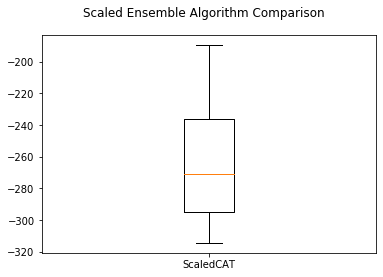

In [20]:
#CompareAlgorithms
fig = plt.figure()
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
#prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = CatBoostRegressor(random_state=seed)
model.fit(rescaledX, Y_train)

Learning rate set to 0.052677
0:	learn: 17989.7107211	total: 8.05ms	remaining: 8.04s
1:	learn: 17120.4271666	total: 11ms	remaining: 5.46s
2:	learn: 16336.0485918	total: 13.9ms	remaining: 4.61s
3:	learn: 15580.1184399	total: 16.7ms	remaining: 4.17s
4:	learn: 14884.9614880	total: 21.2ms	remaining: 4.23s
5:	learn: 14207.3705329	total: 24.1ms	remaining: 3.99s
6:	learn: 13537.6286658	total: 26.9ms	remaining: 3.81s
7:	learn: 12944.0604913	total: 29.7ms	remaining: 3.68s
8:	learn: 12343.9605145	total: 32.5ms	remaining: 3.58s
9:	learn: 11795.3844146	total: 34.8ms	remaining: 3.44s
10:	learn: 11297.6825943	total: 36.8ms	remaining: 3.3s
11:	learn: 10824.2650129	total: 39ms	remaining: 3.21s
12:	learn: 10345.5893174	total: 40.9ms	remaining: 3.11s
13:	learn: 9876.6092775	total: 42.9ms	remaining: 3.02s
14:	learn: 9441.2015952	total: 44.9ms	remaining: 2.95s
15:	learn: 9004.4372143	total: 46.8ms	remaining: 2.88s
16:	learn: 8586.5748005	total: 49ms	remaining: 2.83s
17:	learn: 8190.3618843	total: 51ms	rem

157:	learn: 834.4919893	total: 316ms	remaining: 1.69s
158:	learn: 830.5970156	total: 318ms	remaining: 1.68s
159:	learn: 828.9041540	total: 320ms	remaining: 1.68s
160:	learn: 824.4130059	total: 322ms	remaining: 1.68s
161:	learn: 820.8937649	total: 324ms	remaining: 1.68s
162:	learn: 819.9580708	total: 326ms	remaining: 1.67s
163:	learn: 818.9756039	total: 328ms	remaining: 1.67s
164:	learn: 816.0051609	total: 330ms	remaining: 1.67s
165:	learn: 815.4526909	total: 332ms	remaining: 1.67s
166:	learn: 812.5475820	total: 334ms	remaining: 1.67s
167:	learn: 811.6675841	total: 336ms	remaining: 1.66s
168:	learn: 808.6647871	total: 338ms	remaining: 1.66s
169:	learn: 805.2264398	total: 340ms	remaining: 1.66s
170:	learn: 803.6877145	total: 342ms	remaining: 1.66s
171:	learn: 800.0640875	total: 344ms	remaining: 1.66s
172:	learn: 796.8197013	total: 346ms	remaining: 1.66s
173:	learn: 796.0645762	total: 348ms	remaining: 1.65s
174:	learn: 792.9726749	total: 350ms	remaining: 1.65s
175:	learn: 792.5460979	tota

331:	learn: 536.4208859	total: 647ms	remaining: 1.3s
332:	learn: 534.7967546	total: 649ms	remaining: 1.3s
333:	learn: 534.5998306	total: 651ms	remaining: 1.3s
334:	learn: 533.8641566	total: 653ms	remaining: 1.29s
335:	learn: 533.6751169	total: 655ms	remaining: 1.29s
336:	learn: 532.1290722	total: 657ms	remaining: 1.29s
337:	learn: 530.3659089	total: 659ms	remaining: 1.29s
338:	learn: 530.2429256	total: 661ms	remaining: 1.29s
339:	learn: 530.0640547	total: 663ms	remaining: 1.29s
340:	learn: 528.3816711	total: 665ms	remaining: 1.28s
341:	learn: 528.2102334	total: 667ms	remaining: 1.28s
342:	learn: 526.6530546	total: 669ms	remaining: 1.28s
343:	learn: 525.0254493	total: 671ms	remaining: 1.28s
344:	learn: 524.8604286	total: 673ms	remaining: 1.28s
345:	learn: 523.4078191	total: 675ms	remaining: 1.27s
346:	learn: 523.3042640	total: 677ms	remaining: 1.27s
347:	learn: 523.2033994	total: 678ms	remaining: 1.27s
348:	learn: 521.0550433	total: 680ms	remaining: 1.27s
349:	learn: 519.2826289	total: 

495:	learn: 401.6150383	total: 977ms	remaining: 993ms
496:	learn: 400.8079991	total: 980ms	remaining: 992ms
497:	learn: 400.1268864	total: 982ms	remaining: 990ms
498:	learn: 399.4074840	total: 985ms	remaining: 989ms
499:	learn: 398.4671275	total: 987ms	remaining: 987ms
500:	learn: 398.4324955	total: 995ms	remaining: 991ms
501:	learn: 397.6988258	total: 998ms	remaining: 990ms
502:	learn: 396.8951713	total: 1s	remaining: 988ms
503:	learn: 395.8968489	total: 1s	remaining: 987ms
504:	learn: 395.8727502	total: 1s	remaining: 985ms
505:	learn: 395.0499467	total: 1.01s	remaining: 984ms
506:	learn: 394.3186191	total: 1.01s	remaining: 982ms
507:	learn: 393.4064848	total: 1.01s	remaining: 980ms
508:	learn: 392.7250861	total: 1.01s	remaining: 978ms
509:	learn: 392.1605169	total: 1.01s	remaining: 976ms
510:	learn: 391.2418450	total: 1.02s	remaining: 974ms
511:	learn: 390.3023649	total: 1.02s	remaining: 972ms
512:	learn: 389.4642990	total: 1.02s	remaining: 970ms
513:	learn: 388.5423721	total: 1.02s	

654:	learn: 325.2117692	total: 1.3s	remaining: 687ms
655:	learn: 324.8151051	total: 1.31s	remaining: 685ms
656:	learn: 324.4075920	total: 1.31s	remaining: 683ms
657:	learn: 323.8013754	total: 1.31s	remaining: 681ms
658:	learn: 323.7761006	total: 1.31s	remaining: 679ms
659:	learn: 323.3922359	total: 1.31s	remaining: 677ms
660:	learn: 322.9946657	total: 1.32s	remaining: 676ms
661:	learn: 322.7749721	total: 1.32s	remaining: 676ms
662:	learn: 322.4001512	total: 1.33s	remaining: 674ms
663:	learn: 322.0022817	total: 1.33s	remaining: 672ms
664:	learn: 321.6976048	total: 1.33s	remaining: 670ms
665:	learn: 321.3480872	total: 1.33s	remaining: 668ms
666:	learn: 320.2893941	total: 1.33s	remaining: 666ms
667:	learn: 319.8110751	total: 1.34s	remaining: 664ms
668:	learn: 318.9624787	total: 1.34s	remaining: 662ms
669:	learn: 318.7164485	total: 1.34s	remaining: 660ms
670:	learn: 318.0860297	total: 1.34s	remaining: 658ms
671:	learn: 317.7195923	total: 1.34s	remaining: 656ms
672:	learn: 317.1185060	total

816:	learn: 275.0851824	total: 1.63s	remaining: 365ms
817:	learn: 274.9317613	total: 1.63s	remaining: 363ms
818:	learn: 274.7249417	total: 1.63s	remaining: 361ms
819:	learn: 274.5210121	total: 1.64s	remaining: 359ms
820:	learn: 274.1427001	total: 1.64s	remaining: 357ms
821:	learn: 274.1284027	total: 1.64s	remaining: 355ms
822:	learn: 273.8235930	total: 1.65s	remaining: 354ms
823:	learn: 273.8096051	total: 1.65s	remaining: 352ms
824:	learn: 273.7938851	total: 1.65s	remaining: 350ms
825:	learn: 273.6555405	total: 1.65s	remaining: 348ms
826:	learn: 273.1577750	total: 1.65s	remaining: 346ms
827:	learn: 272.9807207	total: 1.66s	remaining: 344ms
828:	learn: 272.8464936	total: 1.66s	remaining: 342ms
829:	learn: 272.6327089	total: 1.66s	remaining: 340ms
830:	learn: 272.4312203	total: 1.66s	remaining: 338ms
831:	learn: 272.4178417	total: 1.66s	remaining: 336ms
832:	learn: 272.0996250	total: 1.67s	remaining: 334ms
833:	learn: 271.7510492	total: 1.67s	remaining: 332ms
834:	learn: 271.5446665	tota

981:	learn: 241.5311584	total: 1.96s	remaining: 35.9ms
982:	learn: 241.3105849	total: 1.96s	remaining: 33.9ms
983:	learn: 241.0841145	total: 1.96s	remaining: 31.9ms
984:	learn: 240.9224467	total: 1.96s	remaining: 29.9ms
985:	learn: 240.7774917	total: 1.97s	remaining: 27.9ms
986:	learn: 240.7008861	total: 1.97s	remaining: 25.9ms
987:	learn: 240.4660514	total: 1.97s	remaining: 23.9ms
988:	learn: 240.3248303	total: 1.97s	remaining: 21.9ms
989:	learn: 240.1722376	total: 1.97s	remaining: 19.9ms
990:	learn: 239.8778306	total: 1.98s	remaining: 17.9ms
991:	learn: 239.5709055	total: 1.98s	remaining: 16ms
992:	learn: 239.3678652	total: 1.98s	remaining: 14ms
993:	learn: 239.3597855	total: 1.98s	remaining: 12ms
994:	learn: 239.3516085	total: 1.99s	remaining: 9.97ms
995:	learn: 238.9900350	total: 1.99s	remaining: 7.98ms
996:	learn: 238.9820330	total: 1.99s	remaining: 5.98ms
997:	learn: 238.8212047	total: 1.99s	remaining: 3.99ms
998:	learn: 238.6815707	total: 1.99s	remaining: 1.99ms
999:	learn: 238.

In [24]:
#transformthevalidationdataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_absolute_error(Y_test, predictions))

324.7962605276772
